# Logistic Regression Example

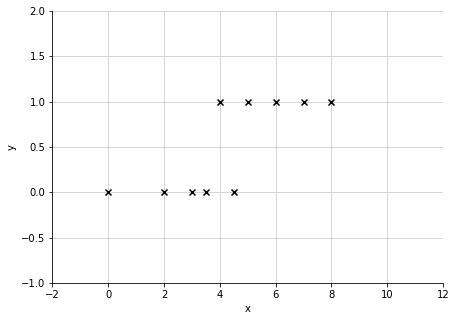

In [1]:
import matplotlib.patches as patches
import numpy as np
import pylab as pl
%matplotlib inline

#toy data
x = np.array([0,2,3,3.5,4,4.5,5,6,7,8])
y = np.array([0,0,0,0,1,0,1,1,1,1])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#generate figure
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)
#Scatter Plot
ax.scatter(x,y,marker="x",zorder=100,color="k")
#Set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")
#Set axis limits
ax.set_ylim(-1,2)
ax.set_xlim(-2,12)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## L2-Loss Regression

Text(10, -0.8, 'L2-Loss=0.11')

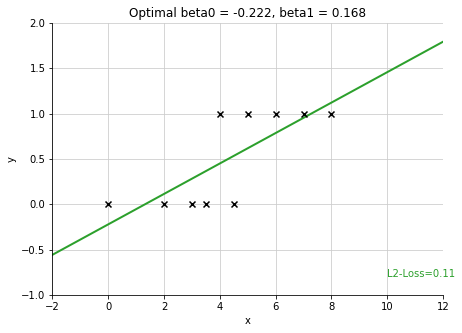

In [2]:
#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1,2)
ax.set_xlim(-2,12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#print("L2-Loss: " + str(sse))
#Add text to plot
ax.text(10,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")


## Decision Function & Outliers

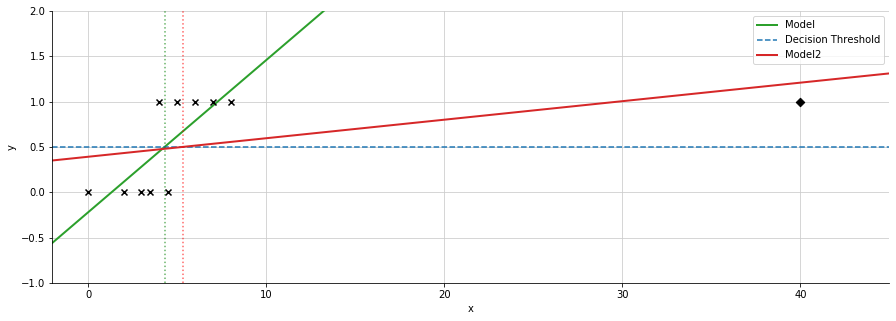

In [3]:
#generate figure
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1,2)
ax.set_xlim(-2,45)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green",label="Model")
ax.grid(color="#CCCCCC")
pl.axhline(0.5,linestyle="dashed",label="Decision Threshold")
pl.axvline(xp[np.where(np.isclose(yp,0.5,0.001))[0][0],1],
           linestyle="dotted",color="green",alpha=0.6)

#toy data
x1 = np.array([0,2,3,3.5,4,4.5,5,6,7,8,40])
y1 = np.array([0,0,0,0,1,0,1,1,1,1,1])

#create design matrix X including rows of 1's for bias
X1 = np.column_stack([np.ones(len(x1)),x1])
#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,45,n)])
#estimate optimal betas
betas = np.linalg.inv((X1.T).dot(X1)).dot(X1.T).dot(y1)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:red",label="Model2")
ax.scatter(x1[-1],y1[-1],marker="D",zorder=100,color="k")
pl.axvline(xp[np.where(np.isclose(yp,0.5,0.001))[0][1],1],
           linestyle="dotted",color="red",alpha=0.6)
pl.legend()

## Plot Logistic Function

Text(0, 0.5, 'y')

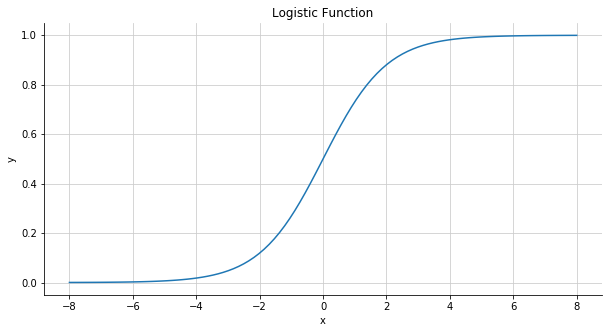

In [4]:
xs = np.linspace(-8,8,100)
#create values for logistic function
ys = 1.0/(1+np.exp(-xs))
#plot logistc function
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(xs,ys)
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Logistic Function")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Plot logistic loss function

(0, 5)

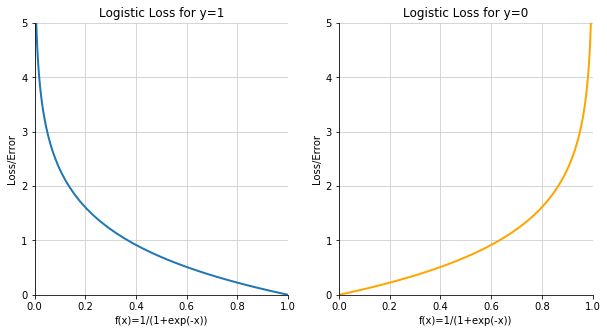

In [5]:


xs = np.linspace(-5,10,100)

fx = 1/(1+np.exp(-xs))
#create values for logistic loss
#if true y==0 then the first term of the loss disapears
y0 = -np.log(1-1.0/(1+np.exp(-xs)))
#if true y==1 then the second term of the loss disapears
y1 = - np.log(1.0/(1+np.exp(-xs)))

#plot logistc function
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(fx,y1,linewidth=2)
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Logistic Loss for y=1")
ax.set_xlabel("f(x)=1/(1+exp(-x))")
ax.set_ylabel("Loss/Error")
ax.set_xlim(0,1)
ax.set_ylim(0,5)

ax = fig.add_subplot(122)
ax.plot(fx,y0,linewidth=2,color="orange")
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Logistic Loss for y=0")
ax.set_xlabel("f(x)=1/(1+exp(-x))")
ax.set_ylabel("Loss/Error")
ax.set_xlim(0,1)
ax.set_ylim(0,5)

## L2 vs. LogLoss using logistic hypothesis class function

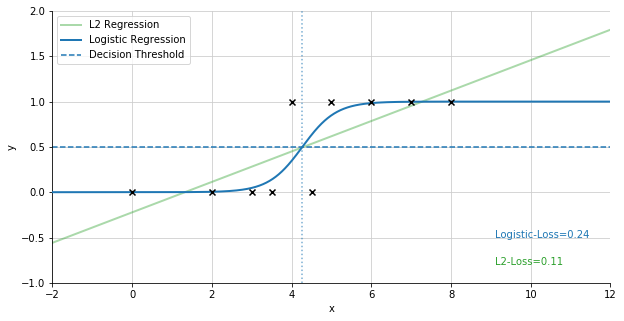

In [6]:
from scipy.optimize import minimize

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()


#Logistic hypothesis class & loss
def logisticf(X,betas):
    return 1.0/(1+np.exp(-(X).dot(betas)))

#compute logistic-loss
def logisticloss(X,y,betas):
    return -y*np.log(logisticf(X,betas))-(1-y)*np.log(1-logisticf(X,betas))
                                                      
def emperical_risk_logit(betas,X,y):
    return 1/len(y) * logisticloss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1,2)
ax.set_xlim(-2,12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas using l2-loss
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green",alpha=0.4,label="L2 Regression")
ax.grid(color="#CCCCCC")
#pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#print("L2-Loss: " + str(sse))
#Add text to plot
ax.text(9.1,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")


#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_logit, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
logloss = emperical_risk_logit(betas_hat,X,y)

#estimate y values for regression line
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue",zorder=50,label="Logistic Regression")
ax.grid(color="#CCCCCC")

#Add text to plot
ax.text(9.1,-.5,"Logistic-Loss=%.2f" % (logloss),color="tab:blue")
pl.axhline(0.5,linestyle="dashed",label="Decision Threshold")
pl.axvline(xp[np.where(np.isclose(yp,0.5,0.001))[0][0],1],
           linestyle="dotted",color="tab:blue",alpha=0.6)
pl.legend()

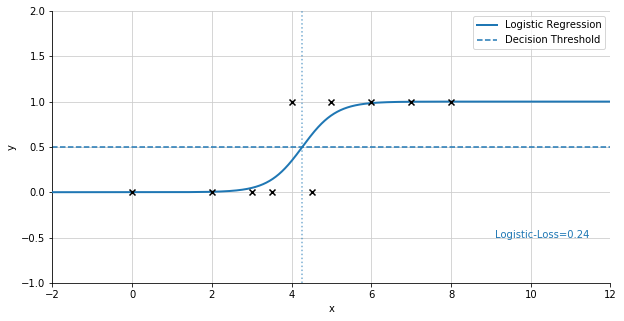

In [7]:
from scipy.optimize import minimize

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()


#Logistic hypothesis class & loss
def logisticf(X,betas):
    return 1.0/(1+np.exp(-(X).dot(betas)))

#compute logistic-loss
def logisticloss(X,y,betas):
    return -y*np.log(logisticf(X,betas))-(1-y)*np.log(1-logisticf(X,betas))
                                                      
def emperical_risk_logit(betas,X,y):
    return 1/len(y) * logisticloss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1,2)
ax.set_xlim(-2,12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])

#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_logit, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
logloss = emperical_risk_logit(betas_hat,X,y)

#estimate y values for regression line
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue",zorder=50,label="Logistic Regression")
ax.grid(color="#CCCCCC")

#Add text to plot
ax.text(9.1,-.5,"Logistic-Loss=%.2f" % (logloss),color="tab:blue")
pl.axhline(0.5,linestyle="dashed",label="Decision Threshold")
pl.axvline(xp[np.where(np.isclose(yp,0.5,0.001))[0][0],1],
           linestyle="dotted",color="tab:blue",alpha=0.6)
pl.legend()

# Effect of $\beta_0$ and $\beta_1$ values

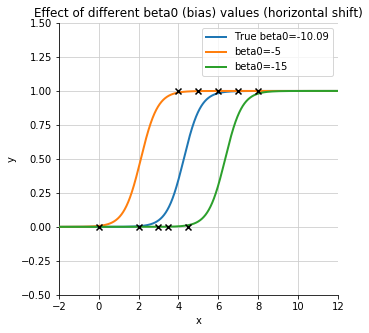

In [8]:
#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])

#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_logit, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
logloss = emperical_risk_logit(betas_hat,X,y)

#estimate y values for regression line
yp = logisticf(xp,betas_hat)

#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue",zorder=50,label="True beta0=%.2f" % betas_hat[0])

#shiftl left
betas_hat[0]=-5
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:orange",zorder=50,label="beta0=-5")

#shiftl right
betas_hat[0]=-15
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green",zorder=50,label="beta0=-15")


#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-0.5,1.5)
ax.set_xlim(-2,12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color="#CCCCCC")
ax.set_title("Effect of different beta0 (bias) values (horizontal shift)")
pl.legend()

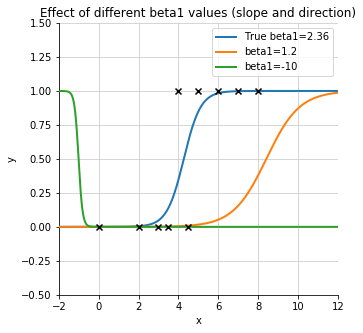

In [9]:
#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])

#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_logit, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
logloss = emperical_risk_logit(betas_hat,X,y)

#estimate y values for regression line
yp = logisticf(xp,betas_hat)

#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue",zorder=50,label="True beta1=%.2f" % betas_hat[1])

#shiftl left
betas_hat[1]=1.2
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:orange",zorder=50,label="beta1=1.2")

#shiftl right
betas_hat[1]=-10
yp = logisticf(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green",zorder=50,label="beta1=-10")


#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-0.5,1.5)
ax.set_xlim(-2,12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color="#CCCCCC")
ax.set_title("Effect of different beta1 values (slope and direction)")
pl.legend()

## Polynomial Regression

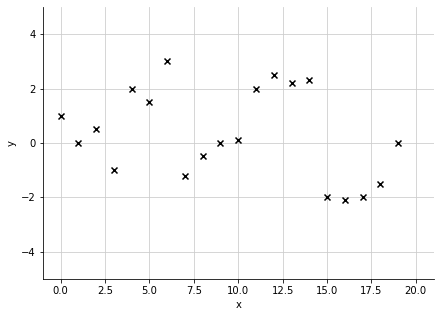

In [10]:
x = np.arange(20)
y = np.array([1,0,0.5,-1,2,1.5,3,-1.2,-0.5,0,0.1,2,2.5,2.2,2.3,-2,-2.1,-2,-1.5,0])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#generate figure
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)
#Scatter Plot
ax.scatter(x,y,marker="x",zorder=100,color="k")
#Set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")
#Set axis limits
ax.set_ylim(-5,5)
ax.set_xlim(-1,21)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(10, -0.8, 'L2-Loss=2.36')

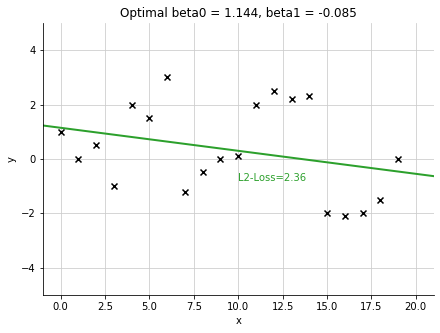

In [11]:
#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-5,5)
ax.set_xlim(-1,21)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,21,n)])
#estimate optimal betas
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#print("L2-Loss: " + str(sse))
#Add text to plot
ax.text(10,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")



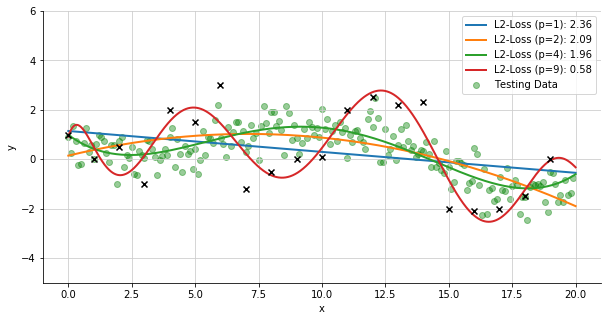

In [12]:
#polynomial
#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-5,6)
ax.set_xlim(-1,21)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
for p in [1,2,4,9]:

    X = np.column_stack([np.ones(len(x)),x])
    xp = np.column_stack([np.ones(n),np.linspace(0,20,n)])

    for i in range(2,p+1):
        X = np.column_stack([X,x**i])
        xp = np.column_stack([xp,(np.linspace(0,20,n))**i])

    #generate some x data to plot linear model for random betas
    n = 10000
    #estimate optimal betas
    betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
    #estimate y values for regression line
    yp = np.dot(xp,betas)
    loss_v = l2loss(X,y,betas)
    sse = emperical_risk_l2(betas,X,y)
    ax.plot(xp[:,1],yp,linewidth=2,label="L2-Loss (p=%d): %.2f" % (p,sse))
    ax.grid(color="#CCCCCC")

    if p==4:
        y_test = (np.dot(xp,betas)+0.6*np.random.randn(n))[::50]
    
        ax.scatter(xp[::50,1],y_test,marker="o",zorder=0,color="g",alpha=0.4,label="Testing Data")

pl.legend()

## Ridge Regression

Text(0.5, 1.0, 'Polynomial Regression with degree=100')

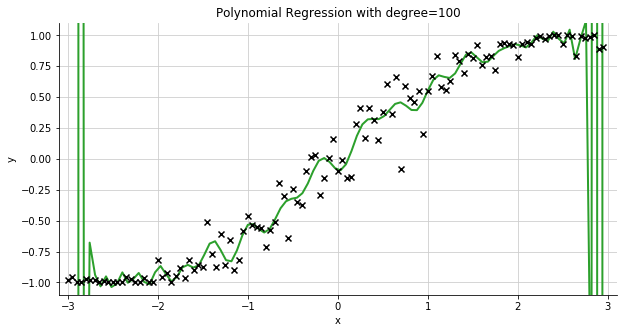

In [13]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

#simulate some data
np.random.seed(42)
x = np.arange(-3,3,1.0/20.0).reshape(-1,1)
y = np.sin(0.2*np.pi*x+0.2*np.random.randn(x.shape[0],1))

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-3.1,3.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 100
p = 100
alpha=0

X = np.column_stack([np.ones(len(x)),x])

xp = np.column_stack([np.ones(n),np.linspace(-3,3,n)])

#create polynomial regression using sklearn
transformer = PolynomialFeatures(degree=p,include_bias=False)
scaler = StandardScaler()
model = LinearRegression()

#Polynomielle Regression mit Feature Scaling
polynomial_regression = Pipeline((
    ('make_poly_features',transformer),
    ("scale_features",scaler),
    ("run_linreg",model),
))

polynomial_regression.fit(X,y)
yp = polynomial_regression.predict(xp)

ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
pl.title("Polynomial Regression with degree=100")

0.9751307761349906


Text(0.5, 1.0, 'Polynomial Regression with degree=100, alpha=50')

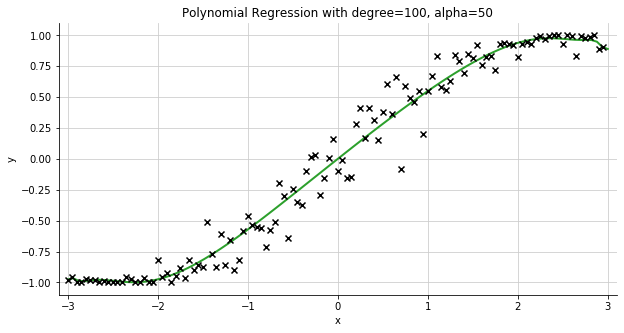

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x = np.arange(-3,3,1.0/20.0).reshape(-1,1)
y = np.sin(0.2*np.pi*x+0.2*np.random.randn(x.shape[0],1))

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-3.1,3.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 100
p = 100
alpha=50

X = np.column_stack([np.ones(len(x)),x])

xp = np.column_stack([np.ones(n),np.linspace(-3,3,n)])

#create polynomial regression using sklearn
transformer = PolynomialFeatures(degree=p,include_bias=False)
scaler = StandardScaler()
model = Ridge(alpha=alpha)

#Polynomielle Regression mit Feature Scaling
ridge_regression = Pipeline((
    ('make_poly_features',transformer),
    ("scale_features",scaler),
    ("run_linreg",model),
))

ridge_regression.fit(X,y)
yp = ridge_regression.predict(xp)

print(ridge_regression.score(X,y))

ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
pl.title("Polynomial Regression with degree=100, alpha=50")

## Effect of $\alpha$ on $\beta$ coefficients

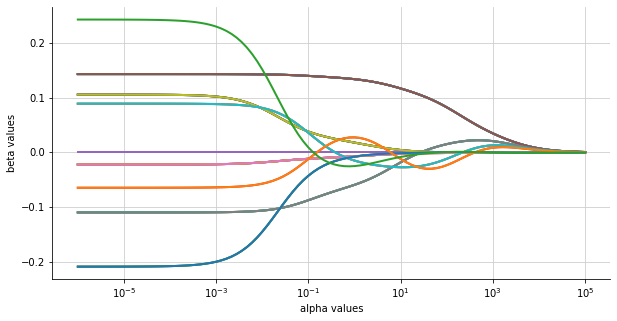

In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x = np.arange(-3,3,1.0/20.0).reshape(-1,1)
y = np.sin(0.2*np.pi*x+0.2*np.random.randn(x.shape[0],1))

#generate some x data to plot linear model for random betas
n = 12
p = 8

X = np.column_stack([np.ones(len(x)),x])
xp = np.column_stack([np.ones(n),np.linspace(-3,3,n)])

#create polynomial regression using sklearn
transformer = PolynomialFeatures(degree=p,include_bias=False)

alphas=np.logspace(5,-6,100)
coefs = []

for alpha in alphas:
    scaler = StandardScaler()
    model = Ridge(alpha=alpha)

    #Polynomielle Regression mit Feature Scaling
    ridge_regression = Pipeline((
        ('make_poly_features',transformer),
        ("scale_features",scaler),
        ("run_linreg",model),
    ))

    ridge_regression.fit(X,y)

    coefs.append(model.coef_.flatten()[1:])

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.set_xscale("log")
ax.set_xlabel("alpha values")
ax.set_ylabel("beta values")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(alphas,coefs,linewidth=2)
ax.grid(color="#CCCCCC")

## Effect of weights with l1-regularization

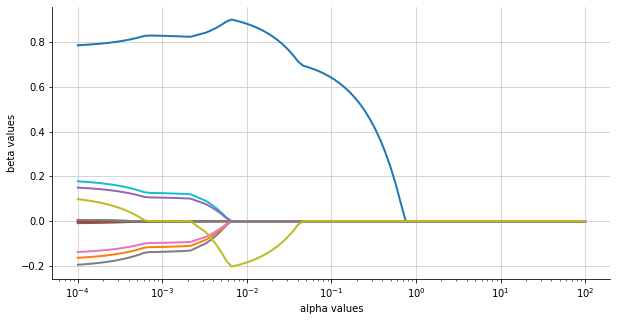

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x = np.arange(-3,3,1.0/20.0).reshape(-1,1)
y = np.sin(0.2*np.pi*x+0.2*np.random.randn(x.shape[0],1))

#generate some x data to plot linear model for random betas
n = 12
p = 5

X = np.column_stack([np.ones(len(x)),x])
xp = np.column_stack([np.ones(n),np.linspace(-3,3,n)])

#create polynomial regression using sklearn
transformer = PolynomialFeatures(degree=p,include_bias=False)

alphas=np.logspace(-4,2,100)
coefs = []

for alpha in alphas:
    scaler = StandardScaler()
    model = Lasso(alpha=alpha)

    #Polynomielle Regression mit Feature Scaling
    lasso_regression = Pipeline((
        ('make_poly_features',transformer),
        ("scale_features",scaler),
        ("run_linreg",model),
    ))

    lasso_regression.fit(X,y)

    coefs.append(model.coef_.flatten()[1:])

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.set_xscale("log")
ax.set_xlabel("alpha values")
ax.set_ylabel("beta values")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(alphas,coefs,linewidth=2)
ax.grid(color="#CCCCCC")